Customer Segmentation and Demand Patterns

Task 1: Segment customers using K-Means clustering

1. Loading Datasets

In [2]:
# Load datasets
import pandas as pd
sales_data = pd.read_csv('sales_data.csv')
customers = pd.read_csv('customers.csv')

In [3]:
sales_data

,order_id,product_name,category,order_date,revenue,region
0,1,Chicken,Meat,2023-12-05,443.177076,West
1,2,Eggs,Dairy,2023-09-30,263.980108,Central
2,3,Vegetables,Meat,2023-03-03,57.065403,South
3,4,Fruits,Dairy,2023-02-01,137.527289,East
4,5,Eggs,Bakery,2023-07-20,290.176776,South
...,...,...,...,...,...,...
4995,4996,Fruits,Bakery,2023-12-16,430.325756,South
4996,4997,Chicken,Bakery,2023-12-01,436.328980,West
4997,4998,Milk,Meat,2023-10-29,227.834215,West
4998,4999,Rice,Dairy,2023-08-23,261.236822,Central


In [4]:
customers

,customer_id,total_spend,num_orders,last_order_date
0,1001,8072.510788,14,2023-05-28
1,1002,4295.331083,39,2023-09-06
2,1003,9527.625896,10,2023-05-10
3,1004,4760.739090,46,2023-03-06
4,1005,6070.383831,45,2023-06-24
...,...,...,...,...
995,1996,5208.117050,4,2023-10-06
996,1997,9912.171374,30,2023-01-20
997,1998,7101.159629,8,2023-11-01
998,1999,7886.051337,46,2023-07-02


Loading the data correctly ensures that we have access to all the relevant information required for customer segmentation. By reading the data into pandas, we are able to manipulate and preprocess it effectively.

2. Extract Features

We extract key features for segmentation, including:

1. Total Spend: The total amount a customer has spent based on their orders.
2. Order Frequency: How many times a customer has placed an order.
3. Recency: How recent the last order was, which is essential for understanding customer engagement.

In [18]:
sales_data.shape

(5000, 6)

In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      5000 non-null   int64         
 1   product_name  5000 non-null   object        
 2   category      5000 non-null   object        
 3   order_date    5000 non-null   datetime64[ns]
 4   revenue       5000 non-null   float64       
 5   region        5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 234.5+ KB


In [15]:
sales_data.isnull().sum()

order_id        0
product_name    0
category        0
order_date      0
revenue         0
region          0
dtype: int64

In [ ]:
customers.shape

In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   total_spend      1000 non-null   float64
 2   num_orders       1000 non-null   int64  
 3   last_order_date  1000 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [17]:
customers.isnull().sum()

customer_id        0
total_spend        0
num_orders         0
last_order_date    0
dtype: int64

In [5]:
customer_sales = sales_data.groupby('order_id').agg(
    total_spend=('revenue', 'sum'),
    order_frequency=('order_id', 'count'),
    recency=('order_date', lambda x: (pd.to_datetime('today') - pd.to_datetime(x.max())).days)
).reset_index()

By aggregating these features, we obtain a consolidated view of each customer's behavior. These three features — total spend, order frequency, and recency — are key to understanding the value and engagement of each customer. This data forms the basis for effective customer segmentation.

Normalise the Data

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_sales[['total_spend', 'order_frequency', 'recency']])

Normalization helps prevent bias toward any one feature and ensures that the K-Means algorithm can treat all features equally. It standardizes the data, making it more suitable for clustering, as K-Means relies on distances between data points to form clusters.



Apply K-Means Clustering

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters: high-value, frequent, and occasional buyers
customer_sales['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The K-Means algorithm groups customers into 3 segments based on their behavior (total spend, frequency, and recency). The centroids of each cluster represent the average values of these features for customers in that segment. The clustering helps us identify distinct customer groups that require different marketing strategies.

Task 2: Analyze sales trends to identify peak ordering periods

1. Analyze Sales by Date: Aggregate sales data by date:

In [8]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
daily_sales = sales_data.groupby('order_date')['revenue'].sum().reset_index()

Aggregating the sales data by date allows us to observe trends over time and detect patterns in sales behavior. By examining the total sales for each day, we can spot peaks and troughs in sales activity, which is essential for identifying high-demand periods.

2. Plot sales overtime

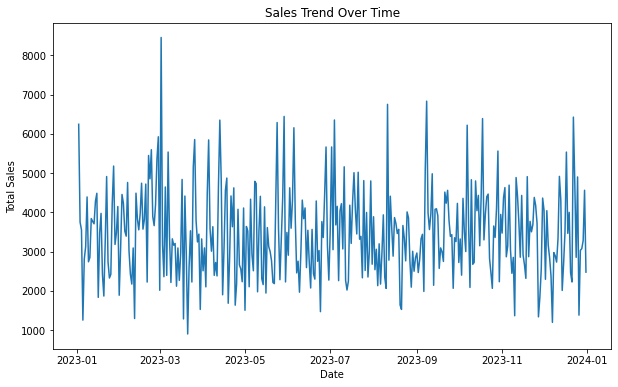

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_date', y='revenue', data=daily_sales)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


The line plot visually highlights fluctuations in sales, making it easier to identify peak periods, such as holidays or promotional periods.
From the above graph we can analyze that total sales has been fluctuating overtime between 1000 to 6000 and has reached its maximum units of 8000 on (05-2023).

3. Identify Peak Sales Periods:

In [10]:
daily_sales['week'] = daily_sales['order_date'].dt.week
weekly_sales = daily_sales.groupby('week')['revenue'].sum().reset_index()


/tmp/ipykernel_65/2035975557.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  daily_sales['week'] = daily_sales['order_date'].dt.week


 By aggregating the data over weeks or months, we gain insights into longer-term sales patterns. Identifying peak sales periods helps in understanding when customers are most likely to buy, which can inform inventory management, promotional scheduling, and sales forecasting.



Task 3: Visualize Customer Segments and Order Patterns

1.Visualize Customer Segments

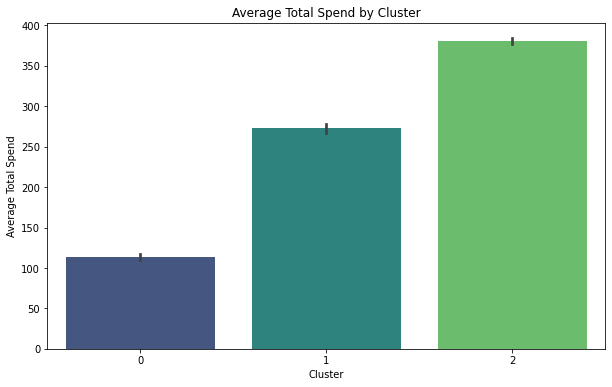

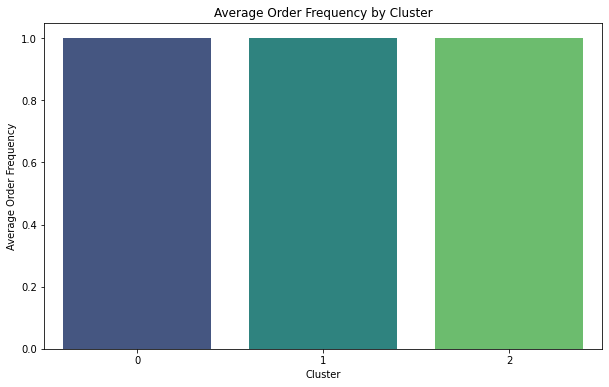

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='total_spend', data=customer_sales, palette='viridis')
plt.title('Average Total Spend by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spend')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='order_frequency', data=customer_sales, palette='viridis')
plt.title('Average Order Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Order Frequency')
plt.show()


This bar plot displays the average total spend for each customer segment (cluster). Each cluster represents a distinct group of customers, and the height of each bar indicates how much, on average, customers within that segment have spent.

From the above graph following can be analysed:
1. High-Value Customers (Cluster-2) have a significantly higher average total spend compared to other clusters. These customers are more engaged, making larger purchases.
2. Frequent but Lower Spend Customers (Cluster-1) may have a moderate total spend, but they place orders more often, which contributes to their high frequency.
3. Occasional Customers (Cluster-0) will likely show the lowest average total spend. They may make fewer purchases or purchase lower-value items, indicating that they have lower engagement and are less likely to respond to sales or promotions.

2. Visualize Order Trends:

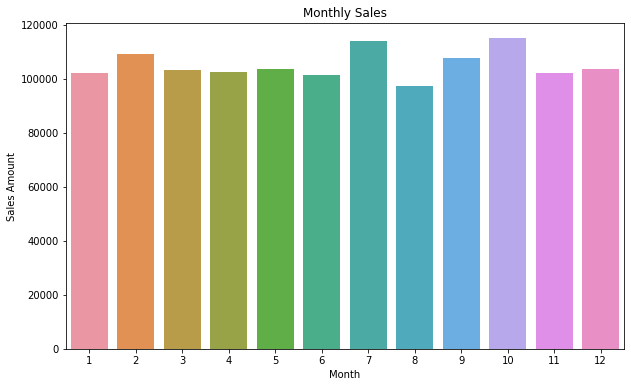

In [13]:
monthly_sales = daily_sales.groupby(daily_sales['order_date'].dt.month)['revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='order_date', y='revenue', data=monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

Bar plots of order trends over time allow us to visualize monthly fluctuations in order volume, which helps in understanding how customer demand evolves over the course of the year. This is particularly useful for identifying seasonal trends, promotional impact, and demand cycles.

From the above graph it can be analysed that customers are highly demanding in the month of October and least demanding in the month of August.